Found 400 validated image filenames belonging to 2 classes.
20/20 [==============================] - 89s 4s/step - loss: 0.3846 - accuracy: 0.8425
Test Loss: 0.38457104563713074
Test Accuracy: 0.8424999713897705
20/20 [==============================] - 83s 4s/step
Confusion Matrix:
[[289  30]
 [ 11  70]]
False Positives (FP): 30
False Negatives (FN): 11
Classification Report:
              precision    recall  f1-score   support

Non-Cataract       0.91      0.96      0.93       300
    Cataract       0.86      0.70      0.77       100

    accuracy                           0.90       400
   macro avg       0.89      0.83      0.85       400
weighted avg       0.90      0.90      0.89       400



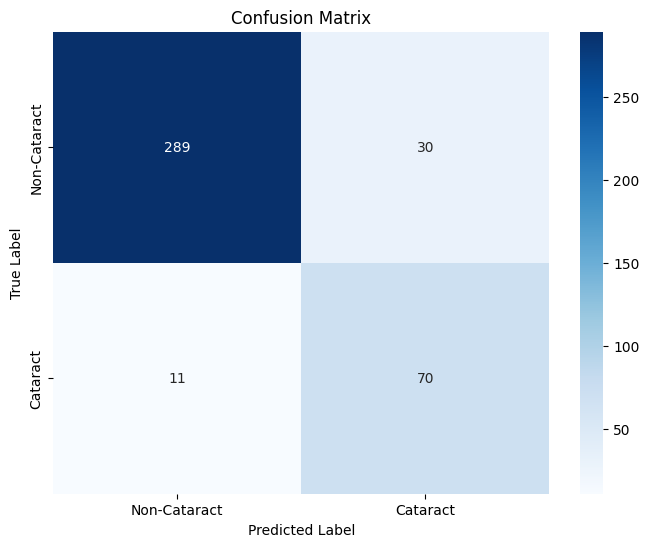

In [2]:
import os
import numpy as np
import pandas as pd
import json
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your trained model (replace 'your_model_path.h5' with the path to your trained model)
model = tf.keras.models.load_model('cataract_detection_vgg19_optimized_1.keras')

# Define the directory containing your test images
test_image_directory = 'newData/dataset/test'  # Replace with the actual directory path

# Load the CSV file with test data (if available)
test_labeled_data = pd.read_csv('testing_data.csv')  # Replace with the actual file path

# Define an ImageDataGenerator for test data with rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for test data
test_generator = test_datagen.flow_from_dataframe(
    test_labeled_data,
    directory=test_image_directory,
    x_col='filename',
    y_col='disease',
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

# Evaluate the model on the test set
evaluation = model.evaluate(test_generator)

# Print the test loss and accuracy
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Get predictions for test data
predictions = model.predict(test_generator)

# Perform further analysis on predictions if needed
# For example, comparing predictions with actual labels, generating confusion matrix, etc.
# Assuming you have ground truth labels for the test set
test_labels = test_generator.labels

# Threshold predictions for binary classification
threshold = 0.75  # Adjust the threshold based on your problem
binary_predictions = (predictions > threshold).astype(int)

# Generate confusion matrix
cm = confusion_matrix(binary_predictions, test_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print False Positives and False Negatives
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

# Generate classification report with precision, recall, F1-score
report = classification_report(test_labels, binary_predictions, target_names=['Non-Cataract', 'Cataract'])
print("Classification Report:")
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cataract', 'Cataract'], yticklabels=['Non-Cataract', 'Cataract'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()